<a href="https://colab.research.google.com/github/cagBRT/computer-vision/blob/master/opencv1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# Clone the entire repo.
!git clone -l -s  https://github.com/cagBRT/computer-vision.git cloned-repo
%cd cloned-repo
!ls

Cloning into 'cloned-repo'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 170 (delta 6), reused 0 (delta 0), pack-reused 154
Receiving objects: 100% (170/170), 98.99 MiB | 32.60 MiB/s, done.
Resolving deltas: 100% (75/75), done.
/content/cloned-repo/cloned-repo
drawing.ipynb			     opencv2.ipynb  opencv9a.ipynb
faceDetection.ipynb		     opencv3.ipynb  opencv9.ipynb
haarcascade_frontalface_default.xml  opencv4.ipynb  opencvKMeans.ipynb
images				     opencv5.ipynb  PassportScan.ipynb
opencv10a.ipynb			     opencv6.ipynb  pedestrians.ipynb
opencv10.ipynb			     opencv7.ipynb  README.md
opencv1.ipynb			     opencv8.ipynb


BGR --> blue green red for openCV

In [16]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
import argparse
import numpy as np
import pandas as pd
import sklearn
from skimage import data, io, filters

In [17]:
!curl -s -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2
from google.colab.patches import cv2_imshow

In [18]:
!pip install mahotas
import mahotas
from __future__ import print_function

TypeError: ignored

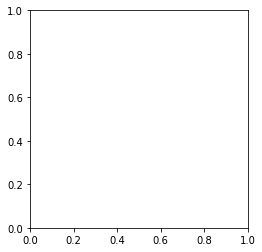

In [22]:
image= cv2.imread("dogs.jpg")
plt.imshow(image)
plt.show()

In [ ]:
(b, g, r) = image[0, 0]
print("Pixel at (0, 0) - Red: {}, Green: {}, Blue: {}".format(r,
g, b))

In [ ]:
image[5:200, 5:200] = (0, 0, 255)

In [ ]:
(b, g, r) = image[0, 0]
r

In [ ]:
plt.imshow(image)
plt.show()

In [ ]:
img = cv2.imread('logo.png', cv2.IMREAD_UNCHANGED)
print(img.shape)
cv2.rectangle(img, (128, 128), (163, 172), (0, 205, 120, 105), 6)
cv2_imshow(img)

In [ ]:
canvas = np.zeros((300, 500, 3), dtype = "uint8")
blue = (255, 0, 0)
cv2.rectangle(canvas, (50, 200), (400, 225), blue, 5)
cv2.rectangle(canvas, (200, 50), (225, 125), blue, -1)
cv2_imshow( canvas)

In [ ]:
canvas = np.zeros((300, 300, 3), dtype = "uint8")
(centerX, centerY) = (canvas.shape[1] // 2, canvas.shape[0] // 2)
white = (255, 255, 255)
for r in range(0, 175, 25):
  cv2.circle(canvas, (centerX, centerY), r, white)
cv2_imshow( canvas)

In [ ]:
#canvas = np.ones((300, 300, 3), dtype = "uint8")
for i in range(0, 25):
 radius = np.random.randint(5, high = 200)
color = np.random.randint(0, high = 256, size = (3,)).tolist()
pt = np.random.randint(0, high = 300, size = (2,))
cv2.circle(canvas, tuple(pt), radius, color, -1) 
cv2_imshow( canvas)
 

In [ ]:
import numpy as np
import argparse
import imutils
import cv2

image = cv2.imread("dog.jpg")
cv2_imshow(image)

(h, w) = image.shape[:2]
center=(w//2,h//2)

M = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
cv2_imshow( rotated)

M = cv2.getRotationMatrix2D(center, -90, 1.0)

rotated = cv2.warpAffine(image, M, (w, h))
cv2_imshow( rotated)

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2

# Load in Grayscale
img = cv2.imread('dog.jpg', 0)

# The underlying representation is a numpy array!
print(type(img))

plt.imshow(img)
plt.show()

In [ ]:
img = cv2.imread('dog.jpg')

plt.imshow(img)
plt.show()

In [ ]:
imgrgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(imgrgb)
plt.show()

# Or, use fun numpy functions / indexing!
imgrgb = img[:,:,::-1]
plt.imshow(imgrgb)
plt.show()

In [ ]:
# Expanding
res = cv2.resize(imgrgb, None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
plt.imshow(res)
plt.show()

In [ ]:
# Shrinking
res = cv2.resize(imgrgb, None,fx=.1, fy=.1, interpolation = cv2.INTER_CUBIC)
plt.imshow(res)
plt.show()

In [ ]:
# make things easier!
img = imgrgb

# Thresholding is cool
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

# Blurring - smoothes the image out
blur = cv2.blur(img,(10, 10))
gblur = cv2.GaussianBlur(imgrgb,(5,5),0)

plt.imshow(img), plt.title('Original')
plt.show()
plt.imshow(blur), plt.title('Blurred')
plt.show()
plt.imshow(gblur),plt.title('Gaussian Blur')
plt.show()

In [ ]:
M = np.ones(image.shape, dtype = "uint8") * 100
added = cv2.add(image, M)
cv2_imshow( added)

M = np.ones(image.shape, dtype = "uint8") * 50
subtracted = cv2.subtract(image, M)
cv2_imshow( subtracted)
cv2.waitKey(0)

In [ ]:
import numpy as np
import cv2

rectangle = np.zeros((300, 300), dtype = "uint8")
cv2.rectangle(rectangle, (25, 25), (275, 275), 255, -1)
cv2_imshow( rectangle)

circle = np.zeros((300, 300), dtype = "uint8")
cv2.circle(circle, (150, 150), 150, 255, -1)
cv2_imshow( circle)

In [ ]:
bitwiseAnd = cv2.bitwise_and(rectangle, circle)
cv2_imshow( bitwiseAnd)

In [ ]:
bitwiseOr = cv2.bitwise_or(rectangle, circle)
cv2_imshow( bitwiseOr)

In [ ]:
bitwiseXor = cv2.bitwise_xor(rectangle, circle)
cv2_imshow( bitwiseXor)


In [ ]:
bitwiseNot = cv2.bitwise_not(circle)
cv2_imshow( bitwiseNot)

In [ ]:
import cv2

image = cv2.imread("dog.jpg")
cv2_imshow( image)


In [ ]:
mask = np.zeros(image.shape[:2], dtype = "uint8")
(cX, cY) = (image.shape[1] // 2, image.shape[0] // 2)
cv2.rectangle(mask, (cX - 75, cY - 75), (cX + 75 , cY + 75), 255,-1)
cv2_imshow( mask)

In [ ]:
masked = cv2.bitwise_and(image, image, mask = mask)
cv2_imshow( masked)

In [ ]:
plt.imshow(cv2.cvtColor(src = img, code = cv2.COLOR_BGR2GRAY), cmap = 'gray');

In [ ]:
resize_width, resize_height = 128, 80
resized = cv2.resize(
  src = img,
  dsize=(resize_width, resize_height),
  interpolation=cv2.INTER_LANCZOS4
)
plt.imshow(image)

In [ ]:
# Code by Adrian Rosebrock
# https://www.pyimagesearch.com/2017/01/02/rotate-images-correctly-with-opencv-and-python/
def rotate_bound(image, angle):
    # grab the dimensions of the image and then determine the
    # center
    (h, w) = image.shape[:2]
    (cX, cY) = (w // 2, h // 2)
    # grab the rotation matrix (applying the negative of the
    # angle to rotate clockwise), then grab the sine and cosine
    # (i.e., the rotation components of the matrix)
    M = cv2.getRotationMatrix2D((cX, cY), -angle, 1.0)
    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])
    # compute the new bounding dimensions of the image
    nW = int((h * sin) + (w * cos))
    nH = int((h * cos) + (w * sin))
    # adjust the rotation matrix to take into account translation
    M[0, 2] += (nW / 2) - cX
    M[1, 2] += (nH / 2) - cY
    # perform the actual rotation and return the image
    return cv2.warpAffine(image, M, (nW, nH))

In [ ]:
img = rotate_bound(image, 70)
plt.imshow(img)